# K-vecinos


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"D:\Ciencia de Datos\5to\Paradigmas\Tema_1\1.3_Analisis_predictivo\tallas.csv")
data.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
altura,170,168,163,168,158,160,168,165,160,158,169,158,170,165,161,170,163,160,165,163
peso,64,62,60,63,63,60,66,61,59,59,67,58,63,65,60,68,61,64,62,64
talla,L,L,M,L,M,M,L,L,M,M,L,M,L,L,M,L,M,L,L,L


In [3]:
talla_map = {'L':1, 'M':0}
data['color'] = data.talla.map(talla_map)
data.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
altura,170,168,163,168,158,160,168,165,160,158,169,158,170,165,161,170,163,160,165,163
peso,64,62,60,63,63,60,66,61,59,59,67,58,63,65,60,68,61,64,62,64
talla,L,L,M,L,M,M,L,L,M,M,L,M,L,L,M,L,M,L,L,L
color,1,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,1,1,1


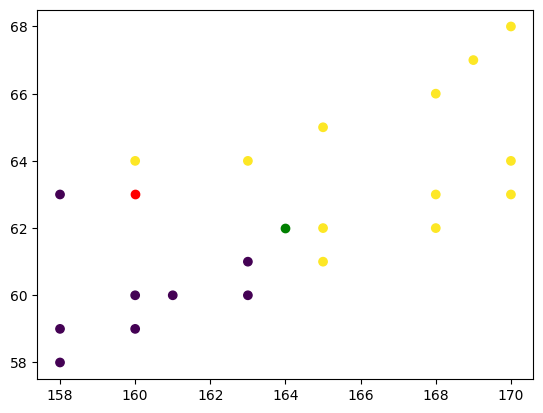

In [4]:
new = pd.DataFrame([[160,63,None, None]])
new.columns = data.columns
new2 = pd.DataFrame([[164,62,None, None]])
new2.columns = data.columns
plt.scatter(data.altura,data.peso, c=data.color)
plt.scatter(new.altura,new.peso, c='red')
plt.scatter(new2.altura,new2.peso, c='green')

In [5]:
def get_closest_points(data, point, k=5):
  data_i = data.iloc[:, 0:2].values
  point_i = point.iloc[:, 0:2].values
  talla = data.talla.values
  dist = [[i,np.linalg.norm(data_i[i] - point_i),talla[i]]
          for i in range(len(data))]
  dist = pd.DataFrame(dist)
  dist.columns = ['index', 'dist', 'talla']
  return dist.sort_values(by='dist').head(k)

In [6]:
c = get_closest_points(data,new)
c

,index,dist,talla
17,17,1.000000,L
4,4,2.000000,M
5,5,3.000000,M
14,14,3.162278,M
19,19,3.162278,L


In [7]:
def show_closest_points(data, point, cercanos, color='k'):
  plt.scatter(data.altura, data.peso, c= data.color)
  plt.scatter(point.altura, point.peso, color=color)
  for c in cercanos.values:
    p = data.iloc[c[0], :]
    plt.plot([point.altura.values[0], p.altura], [point.peso.values[0], p.peso])
plt.show()

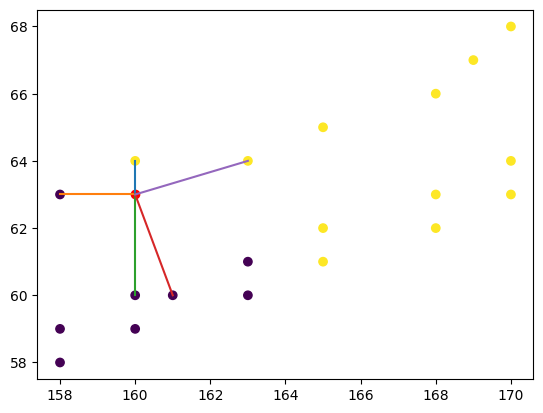

In [8]:
show_closest_points(data, new,c,'r')

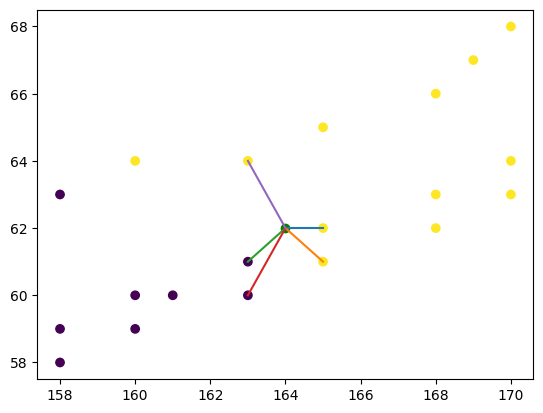

In [9]:
c = get_closest_points(data, new2)
c
show_closest_points(data, new2, c, 'g')

    index      dist talla
18     18  1.000000     L
7       7  1.414214     L
16     16  1.414214     M
2       2  2.236068     M
19     19  2.236068     L
13     13  3.162278     L
14     14  3.605551     M
1       1  4.000000     L
3       3  4.123106     L
17     17  4.472136     L


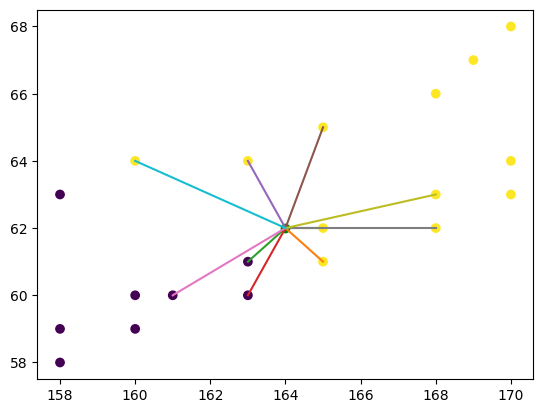

In [10]:
c = get_closest_points(data, new2, 10)
print(c)
show_closest_points(data, new2, c, 'g')

## Sistema de recomendacion de anime

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
anime = pd.read_csv('https://bit.ly/3Ye5Scj')
anime.head(2)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665


In [13]:
anime.shape, anime.isnull().sum()

((10486, 7),
 anime_id      0
 name          0
 genre        62
 type         23
 episodes      0
 rating      211
 members       0
 dtype: int64)

In [14]:
#Data procesing
#Elimnar simblos 'raros' de los nombres
import re
anime.name = anime.name.map(lambda name:re.sub('[^A-Za-z0-9]+', " ", name))
anime.head(2)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665


In [15]:
known_animes = {"Naruto Shippuuden":500, "One Piece":784,"Detective Conan":854, "Dragon Ball Super":86,
                "Crayon Shin chan":942, "Yu Gi Oh Arc V":148,"Shingeki no Kyojin Season 2":25,
                "Boku no Hero Academia 2nd Season":25,"Little Witch Academia TV":25}
for k,v in known_animes.items():
    anime.loc[anime["name"]==k,"episodes"] = v

In [16]:
anime.loc[(anime.type=='OVA')&(anime.episodes=='Unknow'), 'episodes'] = 1
anime.loc[(anime.type=='Movie')&(anime.episodes=='Unknow'), 'episodes'] = 1
anime.loc[(anime.genre =='Hentai')&(anime.episodes=='Unknow'), 'episodes'] = 1

In [17]:
anime.episodes = anime.episodes.map(lambda x:np.nan if x=='Unknown' else x) # Changed 'Unknow' to 'Unknown'
anime.episodes.fillna(anime.episodes.median(), inplace = True)


C:\Users\ENRIQUE\AppData\Local\Temp\ipykernel_25280\2083115991.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  anime.episodes.fillna(anime.episodes.median(), inplace = True)


In [18]:
anime.members = anime.members.astype(float)
anime.rating = anime.rating.astype(float)
anime.rating.fillna(anime.rating.median(), inplace = True)

C:\Users\ENRIQUE\AppData\Local\Temp\ipykernel_25280\2354561934.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  anime.rating.fillna(anime.rating.median(), inplace = True)


In [19]:
anime_features = pd.concat([anime.genre.str.get_dummies(sep=','),
                           pd.get_dummies(anime.type),
                           anime.rating, anime.members,
                           anime.episodes],axis=1)
anime_features.head(2)

,Adventure,Cars,Comedy,Dementia,Demons,Drama,Fantasy,Game,Harem,Historical,...,Vampire,Movie,Music,ONA,OVA,Special,TV,rating,members,episodes
0,0,0,0,0,0,0,0,0,0,0,...,0,True,False,False,False,False,False,9.37,200630.0,1
1,1,0,0,0,0,1,1,0,0,0,...,0,False,False,False,False,False,True,9.26,793665.0,64


In [20]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
anime_features = mms.fit_transform(anime_features)

In [21]:
# modelo k_vecios
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
nbrs.fit(anime_features)

NearestNeighbors(algorithm='ball_tree', n_neighbors=6)

In [22]:
distances, indices = nbrs.kneighbors(anime_features)

In [23]:
all_anime_names = list(anime.name.values)
# funciones auxiliares
def get_index_from_name(name):
  return anime[anime['name'] == name].index.tolist()[0]

def get_id_from_partial_name(partial):
  for name in all_anime_names:
    if partial in name:
      print(name, all_anime_names.index(name))

In [24]:
get_id_from_partial_name('Naruto')

Boruto Naruto the Movie 479
Naruto Shippuuden 607
The Last Naruto the Movie 709
Naruto Shippuuden Movie 6 Road to Ninja 770
Naruto 823
Boruto Naruto the Movie Naruto ga Hokage ni Natta Hi 1069
Naruto Shippuuden Movie 5 Blood Prison 1195
Naruto x UT 1296
Naruto Shippuuden Movie 4 The Lost Tower 1417
Naruto Shippuuden Movie 3 Hi no Ishi wo Tsugu Mono 1511
Naruto Shippuuden Movie 1 1754
Naruto Shippuuden Movie 2 Kizuna 1755
Naruto Shippuuden Shippuu quot Konoha Gakuen quot Den 2255
Naruto Honoo no Chuunin Shiken Naruto vs Konohamaru  2296
Naruto SD Rock Lee no Seishun Full Power Ninden 2334
Naruto Shippuuden Sunny Side Battle 2335
Naruto Movie 1 Dai Katsugeki Yuki Hime Shinobu Houjou Dattebayo  2606
Naruto Soyokazeden Movie Naruto to Mashin to Mitsu no Onegai Dattebayo  2827
Naruto Movie 2 Dai Gekitotsu Maboroshi no Chiteiiseki Dattebayo  3235
Naruto Dai Katsugeki Yuki Hime Shinobu Houjou Dattebayo Special Konoha Annual Sports Festival 3306
Naruto Movie 3 Dai Koufun Mikazuki Jima no Anima

In [25]:
# Busca animes similares puede ser por id o por nombre
def print_similar_animes(query=None,id=None):
  if id:
    for id in indices[id][1:]:
      print(anime.iloc[id]["name"])
  if query:
    found_id = get_index_from_name(query)
    for id in indices[found_id][1:]:
      print(anime.iloc[id]["name"])

In [26]:
print_similar_animes(id=719)

Mobile Suit Gundam 00 Second Season
Mobile Suit Gundam 00
Soukou Kihei Votoms
Mobile Suit Gundam Unicorn RE 0096
Mobile Suit Gundam Seed


In [27]:
print_similar_animes(query='One Piece')

Digimon Frontier
Dragon Ball Z
Dragon Ball Kai
Dragon Ball Super
Shingeki no Kyojin


In [28]:
print_similar_animes('Noragami')

Noragami Aragoto
JoJo no Kimyou na Bouken TV 
JoJo no Kimyou na Bouken Stardust Crusaders
JoJo no Kimyou na Bouken Stardust Crusaders 2nd Season
Yumekui Merry


In [29]:
print_similar_animes('Gintama')

Gintama 039 
Gintama 
Gintama 039 Enchousen
Gintama 2017 
Gintama Movie Kanketsu hen Yorozuya yo Eien Nare


In [30]:
print_similar_animes('Fairy Tail')

Fairy Tail 2014 
Magi The Labyrinth of Magic
Magi The Kingdom of Magic
Densetsu no Yuusha no Densetsu
Magi Sinbad no Bouken TV 
